In [1]:
# import all necessary packages

import numpy as np
import matplotlib.pylab as plt
import shapely
import os

from geopandas import GeoDataFrame
from fiona.crs import from_epsg

%matplotlib inline

In [2]:
PUIDATA = os.getenv('PUIDATA')

Download the Census Tract shapefile from NYC open data. 

http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip

In [3]:
shape_path = os.getenv('PUIDATA') +'/'+ "nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.to_crs(epsg=4326, inplace=True)  # set the co-ordinate system to epsg 4326 

In [4]:
ct_shape.head(3)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,POLYGON ((-74.07920577013245 40.64343078374567...
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438017 40.61085506705416...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910642 40.62600632452712...


We will consider only the Brooklyn borough. 

In [5]:
ct_shape_brooklyn = ct_shape[ct_shape.BoroName == 'Brooklyn']
ct_shape_brooklyn.reset_index(inplace=True)
ct_shape_brooklyn.drop('index', axis=1, inplace=True)

/Users/shalmali/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


To create a map with CUSP location, the co-ordiantes for CUSP were gathered from Google maps. 

CUSP lies at (-73.986733,40.692955). Create a point geometry using _shapely_ 

In [6]:
cusp = shapely.geometry.Point(-73.986733,40.692955)

In [7]:
# search within every polygon to find a polygon(census tract) that contains CUSP point 
# and get the index of that polygon.

cusp_index = 0
for i, ct in zip(ct_shape_brooklyn.index, ct_shape_brooklyn.geometry):
    if shapely.geometry.asShape(ct).contains(cusp):
        print ('CUSP is contained in',ct)
        cusp_index = i

CUSP is contained in POLYGON ((-73.98622595691907 40.69308831340506, -73.98627231669104 40.69219479463378, -73.98729894947923 40.69223407539825, -73.98725396415627 40.69312490273173, -73.98622595691907 40.69308831340506))


In [8]:
# index where the geometry contains CUSP
cusp_index

2554

(-74.05, -73.85)

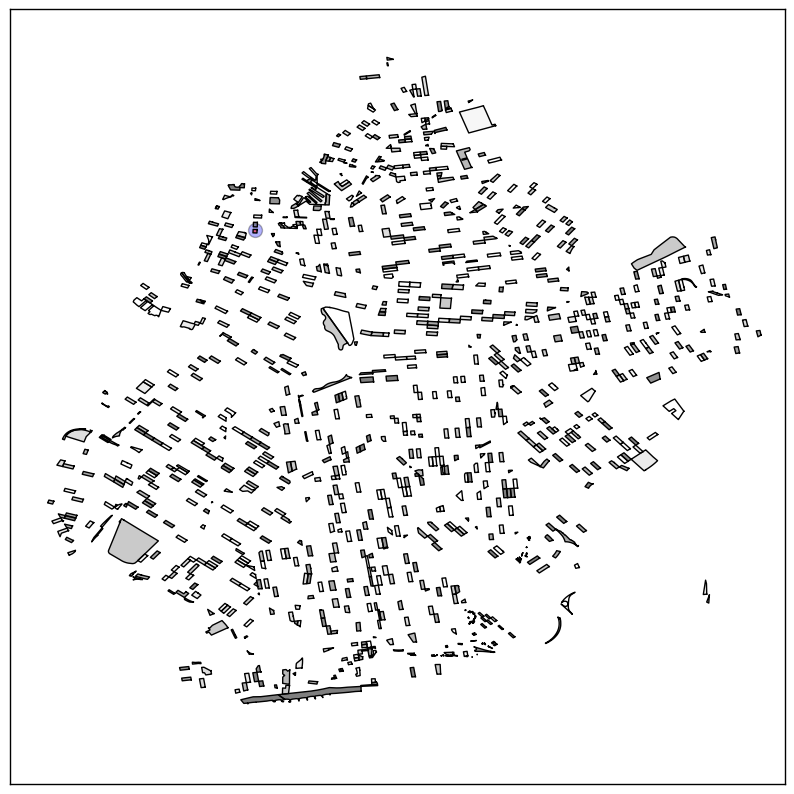

In [9]:
# plot every 10 index
# polygon contains CUSP is colored in red
# CUSP --> purple point

selected_index = np.arange(ct_shape_brooklyn.index.min(),ct_shape_brooklyn.index.max(),10)

f, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# only plot non-NA rows
ct_shape_brooklyn.ix[selected_index].dropna().plot(figsize=(15,10),
                                          cmap='Greys', ax=ax)

# plot CUSP shapefile with red color
GeoDataFrame(ct_shape_brooklyn.ix[cusp_index]).T.plot(ax=ax, color='r')

# plot CUSP point
plt.scatter(-73.986733,40.692955, s=100, c='b', alpha=0.3)
plt.xlim(-74.05,-73.85)

## Figure 1: Brooklyn map with location of CUSP - 1, MetroTech Center, Brooklyn, NY